# Predicting Vehicle Price in Euros using Machine Learning

This Jupyter Notebook applies machine learning models to predict the **price of a vehicle (in Euros)** based on a variety of vehicle features.

### 📊 **Models Used**
- **Linear Regression**
- **Random Forest Regressor**

### 🔧 **Dataset Features**
The dataset contains important vehicle attributes, including:
- Brand
- Model
- Acceleration (0–100 km/h)
- Top Speed (km/h)
- Range (km)
- Efficiency (Wh/km)
- Fast Charging Speed (km/h)
- Has Rapid Charge (Yes/No)
- Drive Type (e.g., RWD, AWD)
- Charging Plug Type (e.g., CCS, Type2)
- Body Type (e.g., SUV, Sedan)
- Segment (e.g., A, B, C)
- Number of Seats

### 🎯 **Project Objectives**
- Predict the **vehicle price in Euros** based on technical and categorical features.
- Apply and compare machine learning models using evaluation metrics such as:
    - Mean Squared Error (MSE)
    - R-squared (R²)
- Visualize and analyze model performance.

✅ **Outcome**: By the end of this notebook, we will have a trained model that can predict the price of new vehicle data entries and compare model performances using error metrics and visual plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\eMotion_EV_Performance_and_Price_Dataset.csv")
df

,Brand,Model,Acceleration_0_100_kmph_sec,TopSpeed_kmph,Range_km,Efficiency_Wh_per_km,FastChargingSpeed_kmph,HasRapidCharge,DriveType,ChargingPlugType,BodyType,Segment,Seats,Price_Euros
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [5]:
df.head()

,Brand,Model,Acceleration_0_100_kmph_sec,TopSpeed_kmph,Range_km,Efficiency_Wh_per_km,FastChargingSpeed_kmph,HasRapidCharge,DriveType,ChargingPlugType,BodyType,Segment,Seats,Price_Euros
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [7]:
df.tail()

,Brand,Model,Acceleration_0_100_kmph_sec,TopSpeed_kmph,Range_km,Efficiency_Wh_per_km,FastChargingSpeed_kmph,HasRapidCharge,DriveType,ChargingPlugType,BodyType,Segment,Seats,Price_Euros
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
102,Byton,M-Byte 95 kWh 2WD,7.5,190,400,238,480,No,AWD,Type 2 CCS,SUV,E,5,62000


In [9]:
df.describe()

,Acceleration_0_100_kmph_sec,TopSpeed_kmph,Range_km,Efficiency_Wh_per_km,FastChargingSpeed_kmph,Seats,Price_Euros
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Brand                        103 non-null    object 
 1   Model                        103 non-null    object 
 2   Acceleration_0_100_kmph_sec  103 non-null    float64
 3   TopSpeed_kmph                103 non-null    int64  
 4   Range_km                     103 non-null    int64  
 5   Efficiency_Wh_per_km         103 non-null    int64  
 6   FastChargingSpeed_kmph       103 non-null    int64  
 7   HasRapidCharge               103 non-null    object 
 8   DriveType                    103 non-null    object 
 9   ChargingPlugType             103 non-null    object 
 10  BodyType                     103 non-null    object 
 11  Segment                      103 non-null    object 
 12  Seats                        103 non-null    int64  
 13  Price_Euros         

In [13]:
df.shape

(103, 14)

In [15]:
df.dtypes

Brand                           object
Model                           object
Acceleration_0_100_kmph_sec    float64
TopSpeed_kmph                    int64
Range_km                         int64
Efficiency_Wh_per_km             int64
FastChargingSpeed_kmph           int64
HasRapidCharge                  object
DriveType                       object
ChargingPlugType                object
BodyType                        object
Segment                         object
Seats                            int64
Price_Euros                      int64
dtype: object

In [17]:
df.isna().sum()

Brand                          0
Model                          0
Acceleration_0_100_kmph_sec    0
TopSpeed_kmph                  0
Range_km                       0
Efficiency_Wh_per_km           0
FastChargingSpeed_kmph         0
HasRapidCharge                 0
DriveType                      0
ChargingPlugType               0
BodyType                       0
Segment                        0
Seats                          0
Price_Euros                    0
dtype: int64

In [19]:
df.columns

Index(['Brand', 'Model', 'Acceleration_0_100_kmph_sec', 'TopSpeed_kmph',
       'Range_km', 'Efficiency_Wh_per_km', 'FastChargingSpeed_kmph',
       'HasRapidCharge', 'DriveType', 'ChargingPlugType', 'BodyType',
       'Segment', 'Seats', 'Price_Euros'],
      dtype='object')

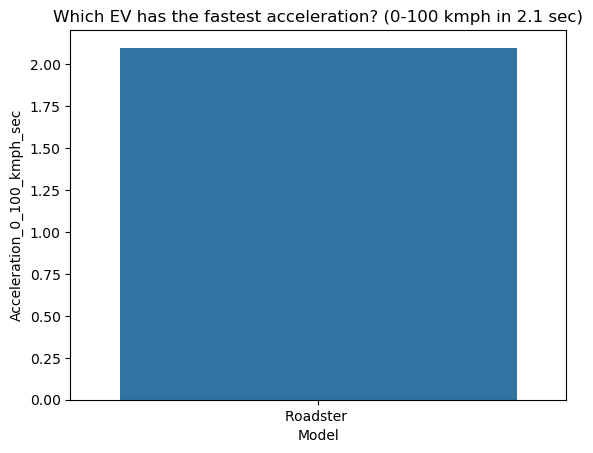

In [25]:
max_accel = df['Acceleration_0_100_kmph_sec'].min()
fastest_car = df[df['Acceleration_0_100_kmph_sec'] == max_accel]

sns.barplot(x='Model', y='Acceleration_0_100_kmph_sec', data=fastest_car)
plt.title(f'Which EV has the fastest acceleration? (0-100 kmph in {max_accel} sec)')
plt.show()


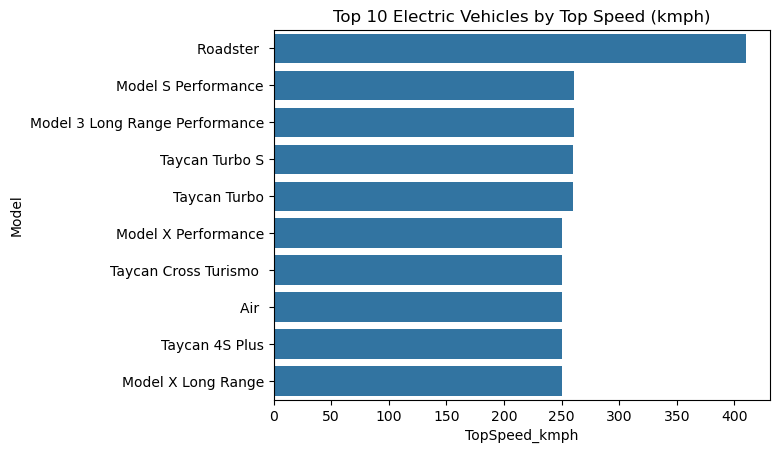

In [29]:
top_speed_df = df.sort_values(by='TopSpeed_kmph', ascending=False).head(10)
sns.barplot(x='TopSpeed_kmph', y='Model', data=top_speed_df)
plt.title('Top 10 Electric Vehicles by Top Speed (kmph)')
plt.show()


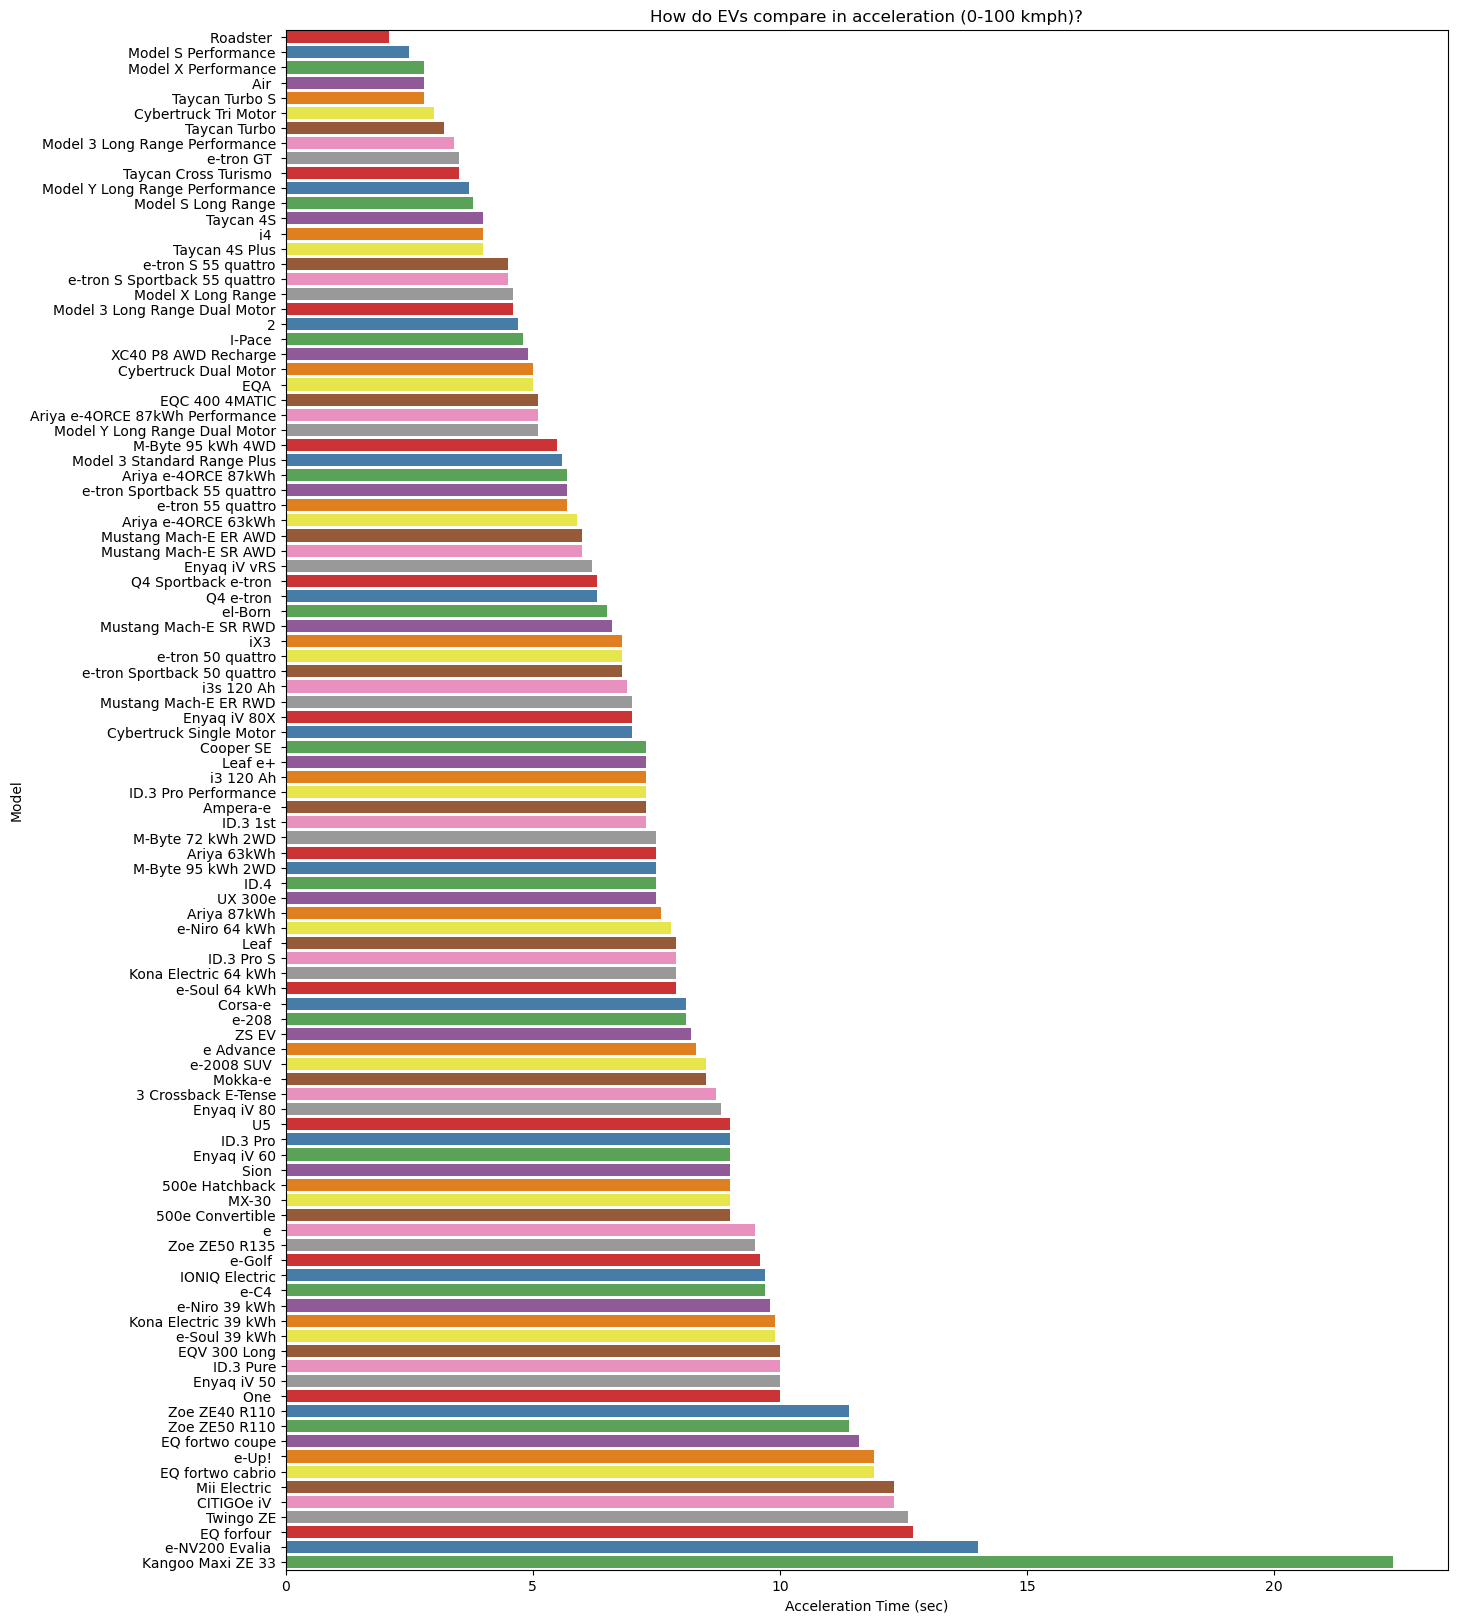

In [66]:
plt.figure(figsize=(15,20))
sns.barplot(x='Acceleration_0_100_kmph_sec', y='Model', data=df.sort_values('Acceleration_0_100_kmph_sec'), palette='Set1')
plt.title('How do EVs compare in acceleration (0-100 kmph)?')
plt.xlabel('Acceleration Time (sec)')
plt.ylabel('Model')
plt.show()


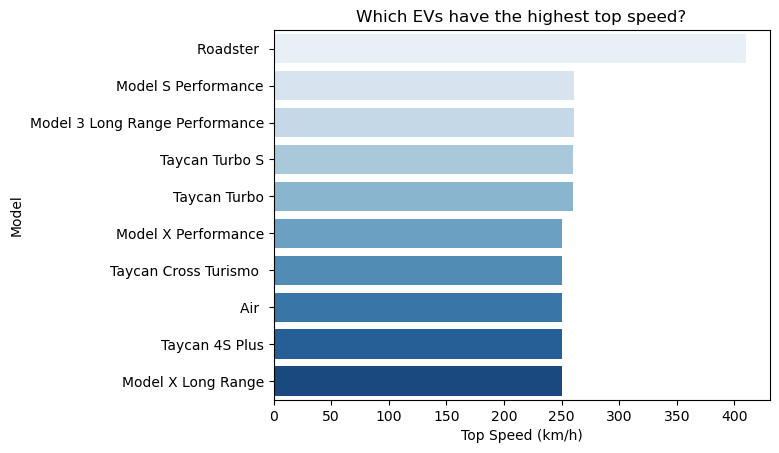

In [38]:
top_speed_df = df.sort_values(by='TopSpeed_kmph', ascending=False).head(10)
sns.barplot(x='TopSpeed_kmph', y='Model', data=top_speed_df, palette='Blues')
plt.title('Which EVs have the highest top speed?')
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Model')
plt.show()


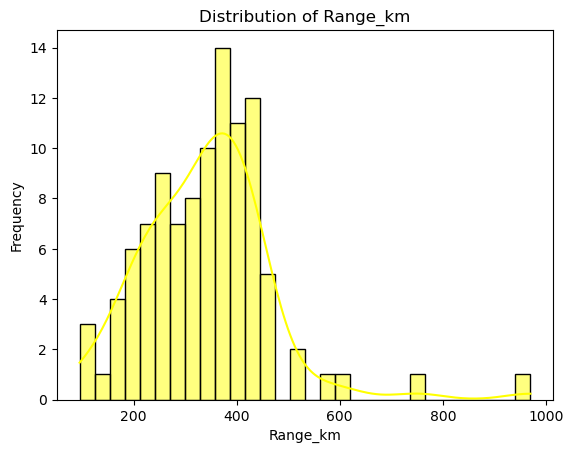

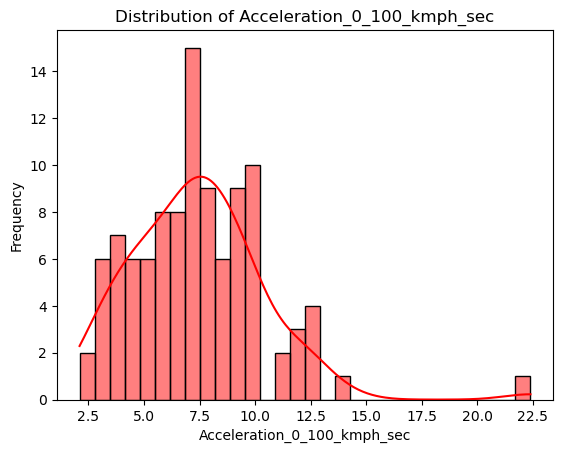

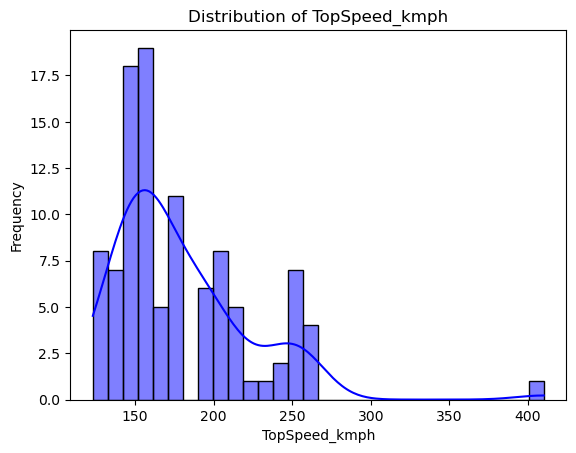

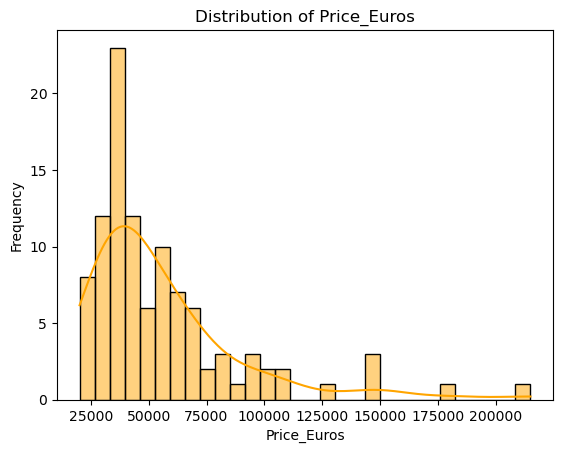

In [40]:
for col, color in zip(['Range_km', 'Acceleration_0_100_kmph_sec', 'TopSpeed_kmph', 'Price_Euros'],
                      ['yellow', 'red', 'blue', 'orange']):
    sns.histplot(df[col], bins=30, kde=True, color=color)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


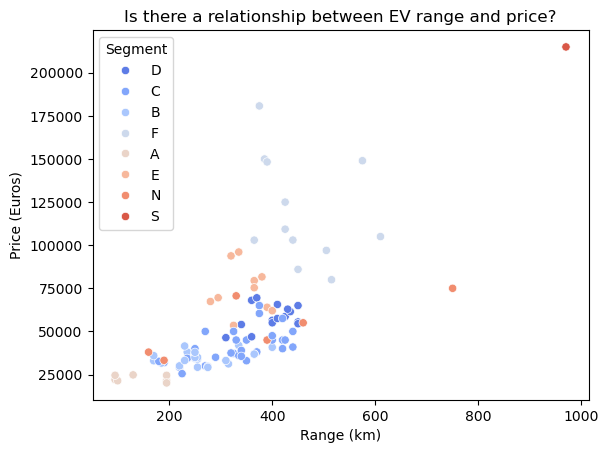

In [42]:
sns.scatterplot(x='Range_km', y='Price_Euros', hue='Segment', data=df, palette='coolwarm')
plt.title('Is there a relationship between EV range and price?')
plt.xlabel('Range (km)')
plt.ylabel('Price (Euros)')
plt.show()


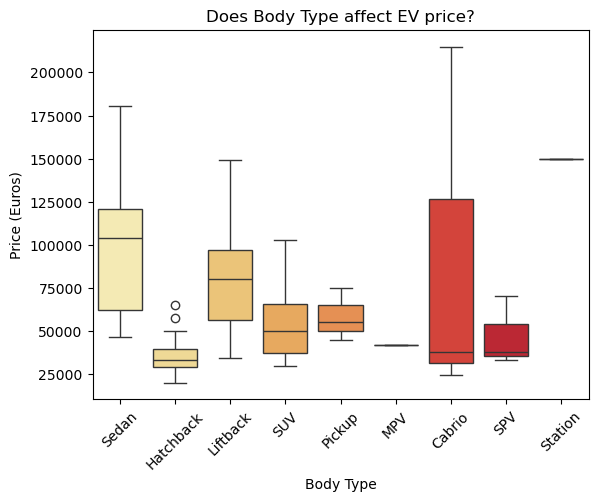

In [44]:
sns.boxplot(x='BodyType', y='Price_Euros', data=df, palette='YlOrRd')
plt.title('Does Body Type affect EV price?')
plt.xlabel('Body Type')
plt.ylabel('Price (Euros)')
plt.xticks(rotation=45)
plt.show()


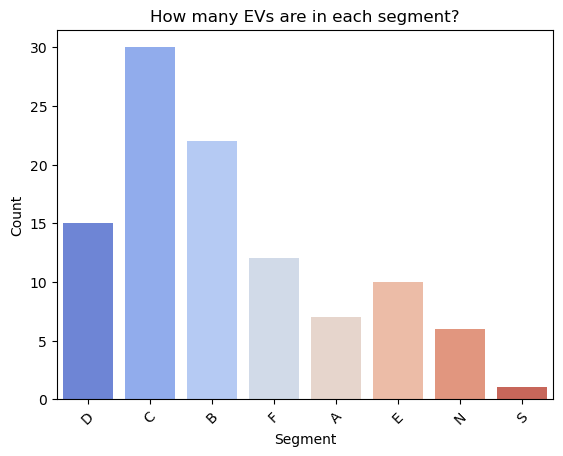

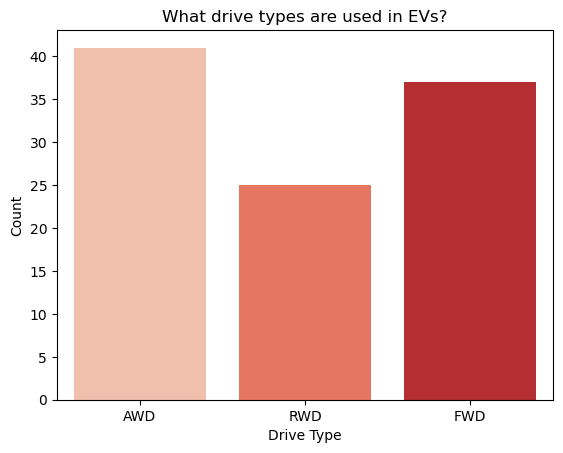

In [46]:
sns.countplot(x='Segment', data=df, palette='coolwarm')
plt.title('How many EVs are in each segment?')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='DriveType', data=df, palette='Reds')
plt.title('What drive types are used in EVs?')
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.show()


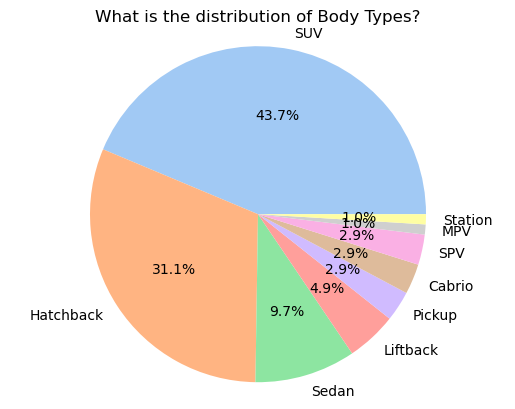

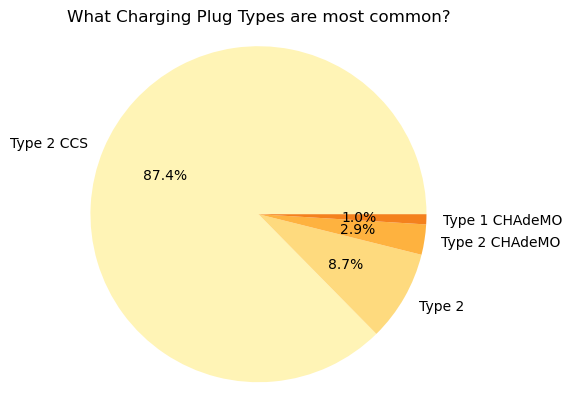

In [48]:
body_counts = df['BodyType'].value_counts()
plt.pie(body_counts, labels=body_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('What is the distribution of Body Types?')
plt.axis('equal')
plt.show()

plug_counts = df['ChargingPlugType'].value_counts()
plt.pie(plug_counts, labels=plug_counts.index, autopct='%1.1f%%', colors=sns.color_palette('YlOrBr'))
plt.title('What Charging Plug Types are most common?')
plt.axis('equal')
plt.show()


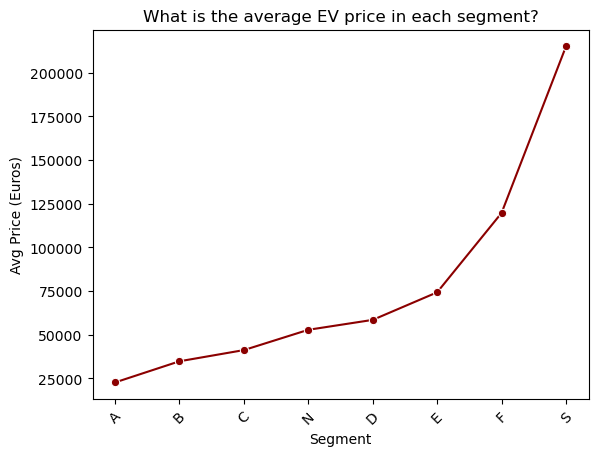

In [50]:
avg_price = df.groupby('Segment')['Price_Euros'].mean().sort_values()
sns.lineplot(x=avg_price.index, y=avg_price.values, marker='o', color='darkred')
plt.title('What is the average EV price in each segment?')
plt.xlabel('Segment')
plt.ylabel('Avg Price (Euros)')
plt.xticks(rotation=45)
plt.show()


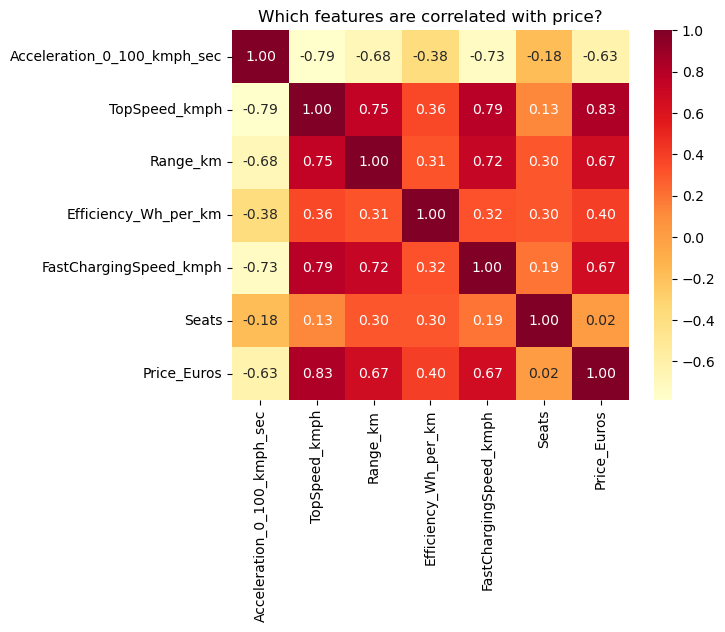

In [52]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Which features are correlated with price?')
plt.show()


In [96]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your full DataFrame is called df
# Identify object (categorical) columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Dictionary to store encoders (if you need later)
encoders = {}

# Encode each categorical column and print the mapping
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

    # Print the mapping
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"\nEncoding for column '{col}':")
    for category, code in mapping.items():
        print(f"  '{category}' → {code}")



Encoding for column 'Brand':
  'Aiways ' → 0
  'Audi ' → 1
  'BMW ' → 2
  'Byton ' → 3
  'CUPRA ' → 4
  'Citroen ' → 5
  'DS ' → 6
  'Fiat ' → 7
  'Ford ' → 8
  'Honda ' → 9
  'Hyundai ' → 10
  'Jaguar ' → 11
  'Kia ' → 12
  'Lexus ' → 13
  'Lightyear ' → 14
  'Lucid ' → 15
  'MG ' → 16
  'Mazda ' → 17
  'Mercedes ' → 18
  'Mini ' → 19
  'Nissan ' → 20
  'Opel ' → 21
  'Peugeot ' → 22
  'Polestar ' → 23
  'Porsche ' → 24
  'Renault ' → 25
  'SEAT ' → 26
  'Skoda ' → 27
  'Smart ' → 28
  'Sono ' → 29
  'Tesla ' → 30
  'Volkswagen ' → 31
  'Volvo ' → 32

Encoding for column 'Model':
  '2' → 0
  '3 Crossback E-Tense' → 1
  '500e Convertible' → 2
  '500e Hatchback' → 3
  'Air ' → 4
  'Ampera-e ' → 5
  'Ariya 63kWh' → 6
  'Ariya 87kWh' → 7
  'Ariya e-4ORCE 63kWh' → 8
  'Ariya e-4ORCE 87kWh' → 9
  'Ariya e-4ORCE 87kWh Performance' → 10
  'CITIGOe iV ' → 11
  'Cooper SE ' → 12
  'Corsa-e ' → 13
  'Cybertruck Dual Motor' → 14
  'Cybertruck Single Motor' → 15
  'Cybertruck Tri Motor' → 16
  'E

In [108]:
df.columns

Index(['Brand', 'Model', 'Acceleration_0_100_kmph_sec', 'TopSpeed_kmph',
       'Range_km', 'Efficiency_Wh_per_km', 'FastChargingSpeed_kmph',
       'HasRapidCharge', 'DriveType', 'ChargingPlugType', 'BodyType',
       'Segment', 'Seats', 'Price_Euros'],
      dtype='object')

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('Price_Euros', axis=1)
y = df['Price_Euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
#Linear Regression:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [114]:
#Evaluate Linear Regression:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nLinear Regression Results:")
print(f"  MSE: {mse_lr:.2f}")
print(f"  R²: {r2_lr:.2f}")


Linear Regression Results:
  MSE: 331769651.35
  R²: 0.58


In [116]:
#Random Forest Regression:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [118]:
#Evaluate Random Forest Regression:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Regression Results:")
print(f"  MSE: {mse_rf:.2f}")
print(f"  R²: {r2_rf:.2f}")


Random Forest Regression Results:
  MSE: 139978329.34
  R²: 0.82


## 🔮 Prediction on New Data

To make predictions on new data using the trained models:

In [143]:
new_data = {
    'Brand': 'Skoda',
    'Model': 'Enyaq',
    'Acceleration_0_100_kmph_sec': 6.5,
    'TopSpeed_kmph': 180,
    'Range_km': 520,
    'Efficiency_Wh_per_km': 170,
    'FastChargingSpeed_kmph': 400,
    'HasRapidCharge': 'Yes',
    'DriveType': 'AWD',
    'ChargingPlugType': 'CCS',
    'BodyType': 'SUV',
    'Segment': 'D',
    'Seats': 5
}


In [145]:
new_df = pd.DataFrame([new_data])


In [147]:
for col in categorical_cols:
    le = encoders[col]
    known_classes = list(le.classes_)
    new_values = new_df[col].values

    # Replace unknown categories with placeholder (e.g., -1)
    encoded_values = []
    for val in new_values:
        if val in known_classes:
            encoded_values.append(le.transform([val])[0])
        else:
            print(f"Warning: Unseen category '{val}' in column '{col}'. Assigning -1.")
            encoded_values.append(-1)

    new_df[col] = encoded_values


In [155]:
lr_prediction = lr_model.predict(new_df)
rf_prediction = rf_model.predict(new_df)

print(f"Linear Regression Prediction: {lr_prediction[0]:.2f} Euro")
print(f"Random Forest Prediction: {rf_prediction[0]:.2f}")


Linear Regression Prediction: 69066.95 Euro
Random Forest Prediction: 66404.76


## 🔮 Predicting on New Data

Once the models (`LinearRegression` and `RandomForestRegressor`) are trained and the categorical columns are label-encoded, we can predict on new (unseen) data by following these steps:

### 1️⃣ Prepare the New Data
Eg:
Create a dictionary with the same feature columns as the training data:

```python
new_data = {
    "Brand": "Volkswagen",
  "Model": "ID.4",
  "Acceleration_0_100_kmph_sec": 8.5,
  "TopSpeed_kmph": 160,
  "Range_km": 408,
  "Efficiency_Wh_per_km": 163,
  "FastChargingSpeed_kmph": 320,
  "HasRapidCharge": "Yes",
  "DriveType": "RWD",
  "ChargingPlugType": "CCS",
  "BodyType": "SUV",
  "Segment": "C",
  "Seats": 5
}

new_df = pd.DataFrame([new_data])


In [159]:
new_data={
  "Brand": "Volkswagen",
  "Model": "ID.4",
  "Acceleration_0_100_kmph_sec": 8.5,
  "TopSpeed_kmph": 160,
  "Range_km": 408,
  "Efficiency_Wh_per_km": 163,
  "FastChargingSpeed_kmph": 320,
  "HasRapidCharge": "Yes",
  "DriveType": "RWD",
  "ChargingPlugType": "CCS",
  "BodyType": "SUV",
  "Segment": "C",
  "Seats": 5
}

In [163]:
new_df = pd.DataFrame([new_data])
for col in categorical_cols:
    le = encoders[col]
    known_classes = list(le.classes_)
    new_values = new_df[col].values

    # Replace unknown categories with placeholder (e.g., -1)
    encoded_values = []
    for val in new_values:
        if val in known_classes:
            encoded_values.append(le.transform([val])[0])
        else:
            print(f"Warning: Unseen category '{val}' in column '{col}'. Assigning -1.")
            encoded_values.append(-1)

    new_df[col] = encoded_values


In [165]:
lr_prediction = lr_model.predict(new_df)
rf_prediction = rf_model.predict(new_df)

print(f"Linear Regression Prediction: {lr_prediction[0]:.2f} Euro")
print(f"Random Forest Prediction: {rf_prediction[0]:.2f}")


Linear Regression Prediction: 31872.26 Euro
Random Forest Prediction: 36807.52


Linear Regression - MSE: 331769651.35, R²: 0.58
Random Forest - MSE: 139978329.34, R²: 0.82


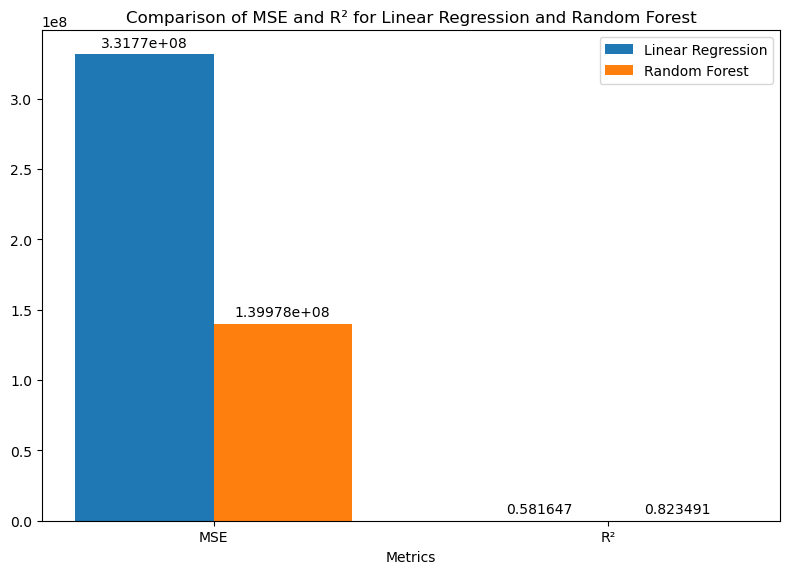

In [178]:
# Calculate MSE and R² for both models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print MSE and R² values
print(f"Linear Regression - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")

# Create a bar chart to compare the models' MSE and R²
metrics = ['MSE', 'R²']
lr_values = [mse_lr, r2_lr]
rf_values = [mse_rf, r2_rf]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, lr_values, width, label='Linear Regression')
rects2 = ax.bar(x + width/2, rf_values, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_title('Comparison of MSE and R² for Linear Regression and Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display the values on top of the bars
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


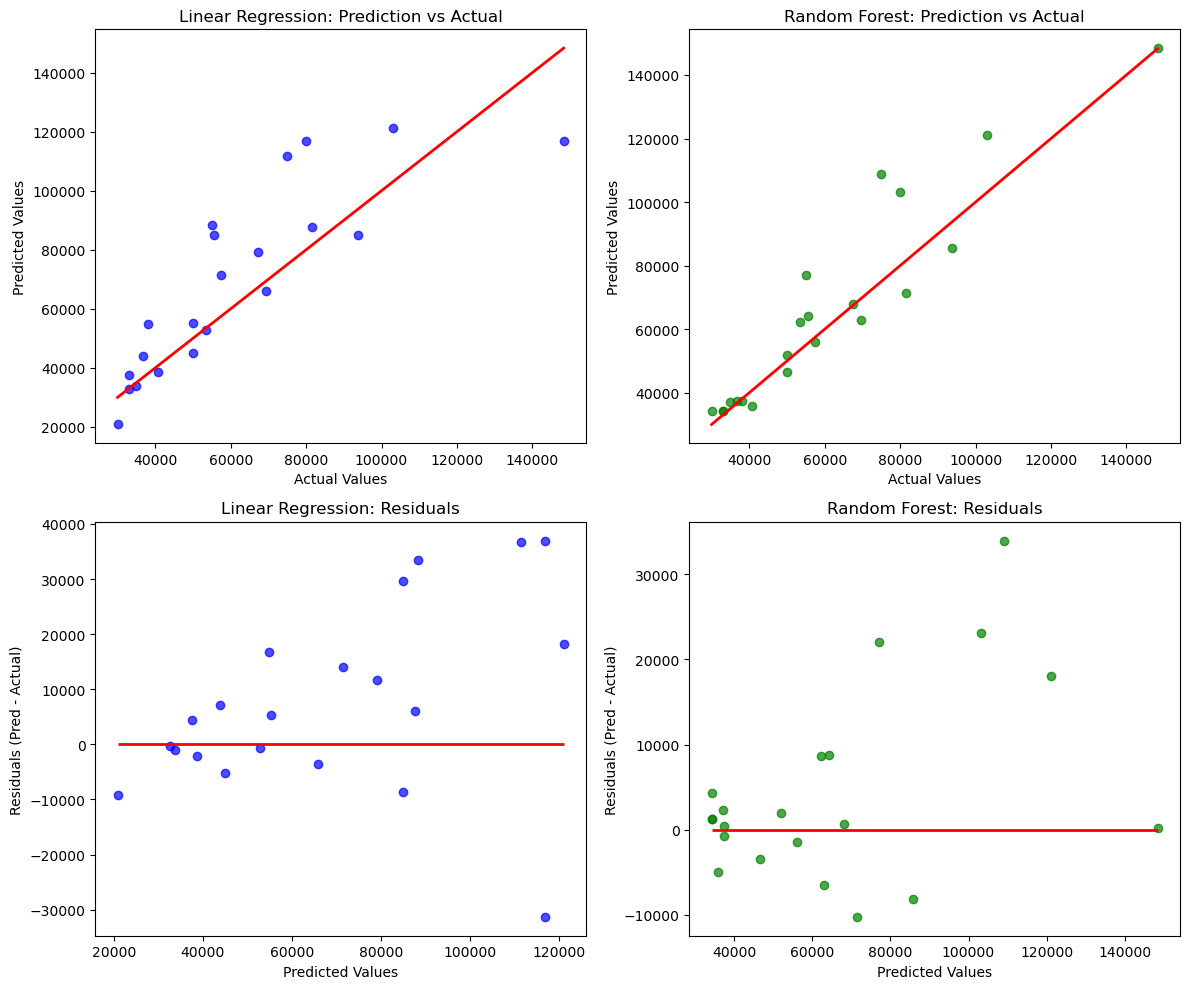

In [194]:
# subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Prediction vs Actual for Linear Regression
axs[0, 0].scatter(y_test, y_pred_lr, color='blue', alpha=0.7)
axs[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
axs[0, 0].set_title("Linear Regression: Prediction vs Actual")
axs[0, 0].set_xlabel("Actual Values")
axs[0, 0].set_ylabel("Predicted Values")

# Plot 2: Prediction vs Actual for Random Forest
axs[0, 1].scatter(y_test, y_pred_rf, color='green', alpha=0.7)
axs[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
axs[0, 1].set_title("Random Forest: Prediction vs Actual")
axs[0, 1].set_xlabel("Actual Values")
axs[0, 1].set_ylabel("Predicted Values")

# Plot 3: Residuals for Linear Regression
axs[1, 0].scatter(y_pred_lr, y_pred_lr - y_test, color='blue', alpha=0.7)
axs[1, 0].hlines(y=0, xmin=y_pred_lr.min(), xmax=y_pred_lr.max(), color='red', lw=2)
axs[1, 0].set_title("Linear Regression: Residuals")
axs[1, 0].set_xlabel("Predicted Values")
axs[1, 0].set_ylabel("Residuals (Pred - Actual)")

# Plot 4: Residuals for Random Forest
axs[1, 1].scatter(y_pred_rf, y_pred_rf - y_test, color='green', alpha=0.7)
axs[1, 1].hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), color='red', lw=2)
axs[1, 1].set_title("Random Forest: Residuals")
axs[1, 1].set_xlabel("Predicted Values")
axs[1, 1].set_ylabel("Residuals (Pred - Actual)")

# Adjust layout
plt.tight_layout()
plt.show()
